In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import gc

In [ ]:
def pegarContorno(img, limiar):
  thresh_img = img
  thresh_img[thresh_img<limiar] = 0
  contorno, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  img_contorno = np.ones(img.shape+(3,))*255
  cv2.drawContours(img_contorno, contorno[1:], -1, (0,0,255), 2)
  return img_contorno, thresh_img, contorno

In [ ]:
def calcularExcentricidade(momento):
  a1 = (momento['mu20']+momento['mu02'])/2
  a2 = np.sqrt(4*momento['mu11']**2+(momento['mu20']-momento['mu02'])**2)/2
  minor_axis = a1-a2
  major_axis = a1+a2
  return np.sqrt(1-minor_axis/major_axis)

In [ ]:
def extrairPropriedades(contorno, img_contorno):
  i = 1
  cores = [(204,204,255),(204,229,255),(204,255,255),(204,255,229),(204,255,204),(229,255,204),(255,255,204),(255,229,204),(255,204,229),(229,204,255)]
  info = []
  areas = []
  obj_pequeno = 0
  obj_medio = 0
  obj_grande = 0
  for cnt_atual in contorno[1:]:
    #Calculo da Area e perimetro
    area = cv2.contourArea(cnt_atual)
    areas.append(area)
    perimetro = cv2.arcLength(cnt_atual,True)

    #Calculo da excentricidade
    momento = cv2.moments(cnt_atual)
    excentricidade = calcularExcentricidade(momento)
    print(excentricidade)

    #Calculo da solidez
    casca = cv2.convexHull(cnt_atual)
    areaDaCasca = cv2.contourArea(casca)
    solidez = area/areaDaCasca

    #Pega o centroide do contorno
    cx = int(momento['m10']/momento['m00'])
    cy = int(momento['m01']/momento['m00'])
    #Preenche o contorno
    cv2.drawContours(img_contorno, contorno, i, cores[i%len(cores)], -1)
    #Escreve a sua respectiva numeração
    cv2.putText(img_contorno, str(i-1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.4 ,(0,0,0))
    i += 1
    if area < 1500:
      obj_pequeno += 1
    elif area >= 1500 and area < 3000:
      obj_medio += 1
    else:
      obj_grande += 1
  plt.hist(areas, bins=[0,1500,3000, max(max(areas),4500)], color='crimson', lw=2, ec='black')
  plt.ylabel('Numero de Objetos')
  plt.xlabel('Área')
  plt.title('Histograma de areas dos objetos')
  return

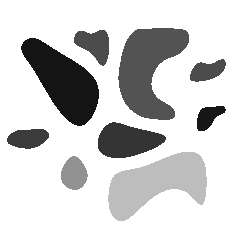

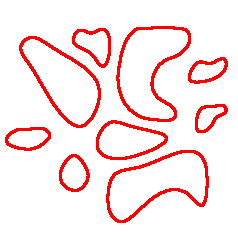

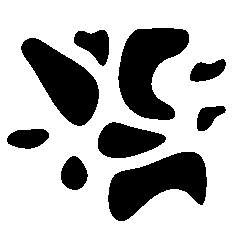

0.6105304464552957
0.9082246167111018
0.8827037926789457
0.8642784962976751
0.8505703620559334
0.8829175264709718
0.8962339635032489
0.7351461568352116
0.813036423809163


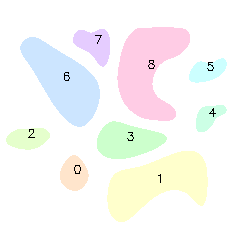

2378

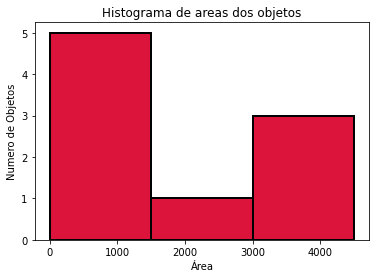

In [ ]:
img = cv2.imread('/content/objetos3.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
img_cnt, ti, cnt = pegarContorno(img, 255)
cv2_imshow(img_cnt)
cv2_imshow(ti)
imgc = np.ones(img.shape+(3,))*255
extrairPropriedades(cnt, imgc)
cv2_imshow(imgc)
gc.collect()